#### Importation de bibliothèques nécessaires 

In [552]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import permutations
from random import shuffle
import random
import math
import joblib
from sklearn.preprocessing import MinMaxScaler

#### Génération des données de la dataset 

In [555]:
# génération de DataFrame avec 10 lignes
data = pd.DataFrame({
    'ClientID': ['Client_1', 'Client_2', 'Client_3', 'Client_4', 'Client_5', 'Client_6', 'Client_7', 'Client_8', 'Client_9', 'Client_10'],
    'Latitude': [35.874540, 36.450714, 36.231994, 36.098658, 35.656018, 35.655995, 35.558084, 36.366176, 36.101115, 36.208073],
    'Longitude': [-6.489708, -6.015045, -6.083779, -6.393830, -6.409088, -6.408298, -6.347879, -6.237622, -6.284027, -6.354385],
    'Priorité': [2, 1, 1, 2, 2, 3, 1, 2, 2, 1],
    'Coût Estimé': [141.131728, 75.578619, 59.757739, 192.332831, 194.844805, 171.259602, 95.692065, 64.650817, 152.634954, 116.022874]
})

In [557]:
# Sauvegarder le DataFrame dans un fichier CSV
data.to_csv('delivery_routes.csv', index=False)

In [559]:
# Charger les données existantes
data = pd.read_csv('delivery_routes.csv')

In [561]:
# Afficher les 10 premières lignes du DataFrame pour un aperçu rapide des données
data.head(10)

ClientID   Latitude  Longitude  Priorité  Coût Estimé
0   Client_1  35.874540  -6.489708         2   141.131728
1   Client_2  36.450714  -6.015045         1    75.578619
2   Client_3  36.231994  -6.083779         1    59.757739
3   Client_4  36.098658  -6.393830         2   192.332831
4   Client_5  35.656018  -6.409088         2   194.844805
5   Client_6  35.655995  -6.408298         3   171.259602
6   Client_7  35.558084  -6.347879         1    95.692065
7   Client_8  36.366176  -6.237622         2    64.650817
8   Client_9  36.101115  -6.284027         2   152.634954
9  Client_10  36.208073  -6.354385         1   116.022874

In [525]:
# Obtenir un résumé statistique des colonnes numériques du DataFrame
data.describe()

Latitude  Longitude   Priorité  Coût Estimé
count  10.000000  10.000000  10.000000    10.000000
mean   36.020137  -6.302366   1.700000   126.390603
std     0.315866   0.151185   0.674949    51.464266
min    35.558084  -6.489708   1.000000    59.757739
25%    35.710649  -6.404681   1.000000    80.606981
50%    36.099886  -6.351132   2.000000   128.577301
75%    36.226014  -6.249223   2.000000   166.603440
max    36.450714  -6.015045   3.000000   194.844805

In [527]:
data.info() # Afficher un résumé des informations du DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClientID     10 non-null     object 
 1   Latitude     10 non-null     float64
 2   Longitude    10 non-null     float64
 3   Priorité     10 non-null     int64  
 4   Coût Estimé  10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 532.0+ bytes


#### Pré-Traitement des données 

#### Gestion des valeurs manquantes 

In [531]:
#Vérification des valeurs manquantes
# La méthode isnull() détecte les valeurs nulles (NaN)
# La méthode sum() calcule le nombre total de valeurs nulles pour chaque colonne
print("\nValeurs manquantes :\n", data.isnull().sum())


Valeurs manquantes :
 ClientID       0
Latitude       0
Longitude      0
Priorité       0
Coût Estimé    0
dtype: int64


#### Gestion des doublons 

In [534]:
# Vérifier les doublons
duplicates = data.duplicated()
print("Nombre de doublons :", duplicates.sum())

Nombre de doublons : 0


#### Visualisation 

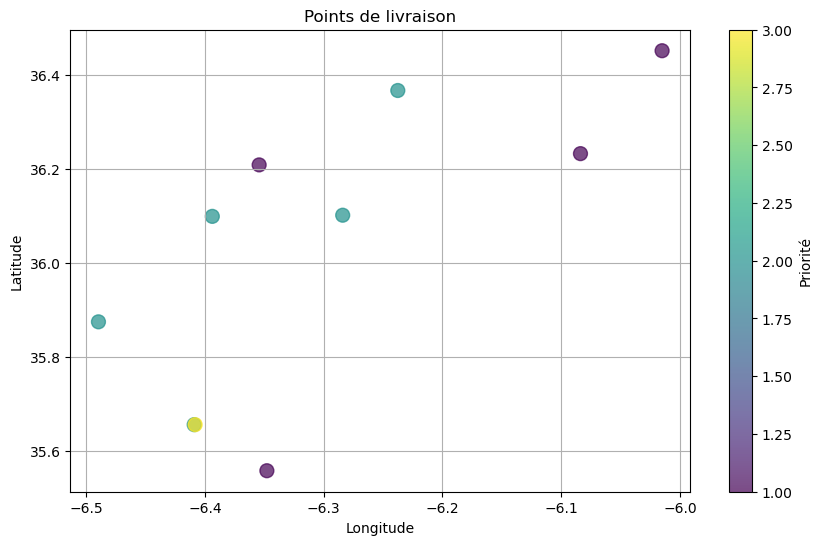

In [537]:
# Visualiser les points de livraison
# Définir la taille de la figure pour la visualisation
plt.figure(figsize=(10, 6))
# Créer un nuage de points (scatter plot)
# Utilisation des coordonnées Longitude et Latitude pour les axes X et Y
# Les points sont colorés en fonction de la priorité des livraisons, en utilisant la palette de couleurs 'viridis'
# La taille des points est définie par s=100 et la transparence par alpha=0.7
plt.scatter(df['Longitude'], df['Latitude'], c=df['Priorité'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Priorité')
plt.title('Points de livraison')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
# Afficher le graphique
plt.show()

#### Encodage de la colonne catégorielle ClientID en une colonne numérique 

In [540]:
# Encodage de la colonne ClientID (extraction du numéro du client)
data['ClientID'] = data['ClientID'].apply(lambda x: int(x.split('_')[1]))

In [542]:
data.head() #Vérifier si la colonne a été bien convertie 

ClientID   Latitude  Longitude  Priorité  Coût Estimé
0         1  35.874540  -6.489708         2   141.131728
1         2  36.450714  -6.015045         1    75.578619
2         3  36.231994  -6.083779         1    59.757739
3         4  36.098658  -6.393830         2   192.332831
4         5  35.656018  -6.409088         2   194.844805

#### Normalisation des variables numériques 

In [545]:
#Pour une amelioration des algorithmes 
# Normalisation des variables numériques 
scaler = StandardScaler()
# La méthode fit_transform() ajuste le scaler sur les données et les transforme
# fit() calcule la moyenne et l'écart type des colonnes sélectionnées,
# Ici, les colonnes 'Latitude', 'Longitude' et 'Coût Estimé' sont normalisées.
data[['Latitude', 'Longitude', 'Coût Estimé']] = scaler.fit_transform(data[['Latitude', 'Longitude', 'Coût Estimé']])

# Vérification après normalisation
print(data[['Latitude', 'Longitude', 'Coût Estimé']].head())

   Latitude  Longitude  Coût Estimé
0 -0.485879  -1.306183     0.301928
1  1.436904   2.003257    -1.040732
2  0.707001   1.524030    -1.364776
3  0.262038  -0.637704     1.350631
4 -1.215121  -0.744085     1.402081


#### la division des données d'entraînement et de test 

In [453]:
# Séparer les features (X) et la cible (y)
# X contient les colonnes utilisées pour prédire (les caractéristiques)
X = data[['ClientID', 'Latitude', 'Longitude', 'Priorité']]  
# y contient la colonne cible à prédire
y = data['Coût Estimé']  # La cible

In [455]:
# Séparer le dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### L'entraînement du modèle 

In [458]:
# Créer et entraîner le modèle RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [460]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Afficher les premières prédictions
print("\nPrédictions sur les données de test:")
print(y_pred[:5])


Prédictions sur les données de test:
[-0.39527285 -0.88364396]


In [464]:
# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)  # Calcule l'erreur quadratique moyenne (MSE) entre les valeurs réelles et les prédictions
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")  # Affiche la MSE sous forme d'un nombre à deux décimales

Erreur quadratique moyenne (MSE) : 0.45


#### La fonction coût 

In [467]:
# Fonction de coût : distance totale d'un itinéraire
def total_distance(route, distance_matrix):
    # Calcule la somme des distances entre chaque paire de clients successifs dans le chemin
    distance = sum(distance_matrix[route[i]][route[i+1]] for i in range(len(route) - 1))
    
    # Ajoute la distance du dernier client au premier client (pour fermer le circuit)
    return distance + distance_matrix[route[-1]][route[0]]  # Retour au point de départ

#### Algorithme de recuit simulé

In [470]:
# Algorithme de recuit simulé
def simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations):
    n = len(distance_matrix)  # Nombre de points de livraison
    current_solution = list(range(n))  # Solution initiale (ordre des points)
    random.shuffle(current_solution)  # Mélange aléatoire des points
    current_cost = total_distance(current_solution, distance_matrix)  # Coût initial (distance totale)
    
    best_solution = current_solution[:]  # Meilleure solution trouvée
    best_cost = current_cost  # Meilleur coût trouvé
    
    temp = initial_temp  # Température initiale
    
    for iteration in range(max_iterations):  # Boucle principale
        # Génération d'une nouvelle solution voisine (échange de deux points)
        new_solution = current_solution[:]
        i, j = random.sample(range(n), 2)  # Choix aléatoire de deux indices
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Échange des positions
        
        new_cost = total_distance(new_solution, distance_matrix)  # Coût de la nouvelle solution
        
        # Décision d'accepter la nouvelle solution :
        # 1. Si la nouvelle solution est meilleure (coût inférieur), on l'accepte.
        # 2. Sinon, on l'accepte avec une probabilité dépendant de la température.
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temp):
            current_solution = new_solution  # Mettre à jour la solution actuelle
            current_cost = new_cost  # Mettre à jour le coût actuel
        
        # Mise à jour du meilleur résultat trouvé
        if current_cost < best_cost:
            best_solution = current_solution  # Nouvelle meilleure solution
            best_cost = current_cost  # Nouveau meilleur coût
        
        # Refroidissement : on diminue progressivement la température
        temp *= cooling_rate
    
    return best_solution, best_cost  # Retourner la meilleure solution et son coût

#### Matrice de corrélation

In [481]:
# Calcul du MSE(Erreur quadratique moyenne), RMSE(Écart quadratique moyen) et R²(Coefficient de détermination)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

Erreur quadratique moyenne (MSE): 0.44740600386258483
Écart quadratique moyen (RMSE): 0.6688841483116377
Coefficient de détermination : 0.28154564033503193


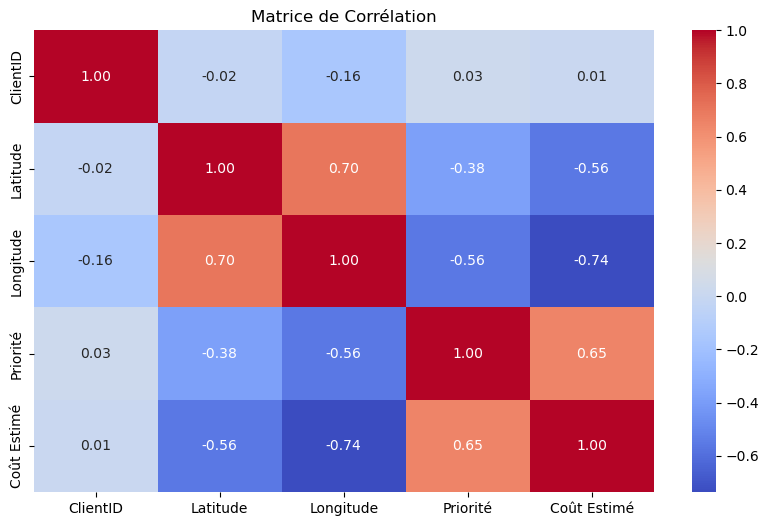

In [483]:
# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Écart quadratique moyen (RMSE): {rmse}")
print(f"Coefficient de détermination : {r2}")

# Matrice de corrélation
corr_matrix = data.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()

#### Matrice de distances 

In [311]:
# Matrice de distances 
distance_matrix = np.random.randint(10, 100, size=(10, 10))
np.fill_diagonal(distance_matrix, 0)

# Paramètres du recuit simulé
initial_temp = 1000
cooling_rate = 0.995
max_iterations = 1000

# Exécution de l'algorithme
optimal_route, optimal_cost = simulated_annealing(distance_matrix, initial_temp, cooling_rate, max_iterations)

print("Itinéraire optimal :", optimal_route)
print("Coût total :", optimal_cost)

Itinéraire optimal : [4, 2, 8, 3, 1, 7, 0, 9, 6, 5]
Coût total : 283


In [485]:
# Matrice de distance (calcul de la distance euclidienne entre les clients)
from scipy.spatial.distance import cdist

# Extraire les coordonnées des clients (longitude, latitude)
coordinates = df[['Longitude', 'Latitude']]

# Calculer la matrice de distance (distance euclidienne)
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')

# Afficher la matrice de distance
print("Matrice de Distance :\n", distance_matrix)

Matrice de Distance :
 [[0.00000000e+00 7.46512854e-01 5.40880500e-01 2.43765192e-01
  2.32919404e-01 2.33215577e-01 3.46785042e-01 5.52497337e-01
  3.06008014e-01 3.59939684e-01]
 [7.46512854e-01 0.00000000e+00 2.29265787e-01 5.17128131e-01
  8.87024023e-01 8.86693978e-01 9.52662998e-01 2.38090727e-01
  4.41101776e-01 4.17164584e-01]
 [5.40880500e-01 2.29265787e-01 0.00000000e+00 3.37505721e-01
  6.61493989e-01 6.61125880e-01 7.23811784e-01 2.04138379e-01
  2.39224945e-01 2.71661226e-01]
 [2.43765192e-01 5.17128131e-01 3.37505721e-01 0.00000000e+00
  4.42902897e-01 4.42899373e-01 5.42523496e-01 3.09785118e-01
  1.09830486e-01 1.16307997e-01]
 [2.32919404e-01 8.87024023e-01 6.61493989e-01 4.42902897e-01
  0.00000000e+00 7.90334739e-04 1.15488571e-01 7.30564832e-01
  4.62332773e-01 5.54758633e-01]
 [2.33215577e-01 8.86693978e-01 6.61125880e-01 4.42899373e-01
  7.90334739e-04 0.00000000e+00 1.15052247e-01 7.30402184e-01
  4.62141857e-01 5.54704182e-01]
 [3.46785042e-01 9.52662998e-01 7.2

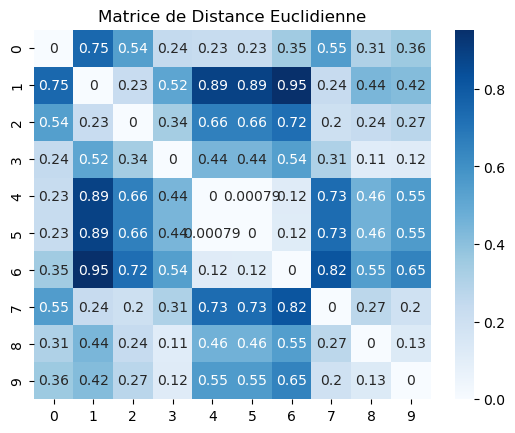

In [487]:
# Visualisation de la matrice de distance sous forme de heatmap
sns.heatmap(distance_matrix, annot=True, cmap='Blues')
plt.title("Matrice de Distance Euclidienne")
plt.show()

In [512]:
# Comparaison des résultats
print("Performance du Random Forest :")
print("Erreur Quadratique Moyen :", mse)

print("\nPerformance du Recuit simulé :")
print("Coût total de l'itinéraire :", optimal_cost)

Performance du Random Forest :
Erreur Quadratique Moyen : 0.44740600386258483

Performance du Recuit simulé :
Coût total de l'itinéraire : 283
